In [1]:
import sys
import pathlib
sys.path.append(str(pathlib.Path().resolve().parent))

In [2]:
import numpy as np
import pandas as pd

from ta.trend import ema_indicator

from utils import load_data

In [3]:
def preprocessing(candles: pd.DataFrame) -> pd.DataFrame:
    df = pd.DataFrame()
    price = candles["Close"]
    volume = candles["Volume"]
    ema20 = ema_indicator(price, 20)
    ema50 = ema_indicator(price, 50)
    ema200 = ema_indicator(price, 200)

    df["diff_price_pct"] = price.pct_change(1)
    df["diff_log_price"] = np.log(price.shift(1)) - np.log(price)
    df["diff_price20_pct"] = price.pct_change(20)
    df["diff_price50_pct"] = price.pct_change(50)
    df["diff_price200_pct"] = price.pct_change(200)
    df["volatility20"] = np.log(price).diff().rolling(20).std()
    df["volatility50"] = np.log(price).diff().rolling(50).std()
    df["volatility200"] = np.log(price).diff().rolling(200).std()
    df["diff_ema20_pct"] = (price - ema20) / ema20
    df["diff_ema50_pct"] = (price - ema50) / ema50
    df["diff_ema200_pct"] = (price - ema200) / ema200
    df["diff_volume_pct"] = volume.pct_change(1)
    df["diff_log_volume"] = np.log(volume.shift(1)) - np.log(volume)
    # df = df.fillna(0)
    return df

In [4]:
def normalizing(df):
    normalized_df = df.copy()
    column_names = normalized_df.columns.tolist()
    for column in column_names:
        # Logging and Differencing
        test = np.log(normalized_df[column]) - np.log(normalized_df[column].shift(1))
        if test[1:].isnull().any():
            normalized_df[column] = normalized_df[column] - normalized_df[column].shift(1)
        else:
            normalized_df[column] = np.log(normalized_df[column]) - np.log(normalized_df[column].shift(1))
        # Min Max Scaler implemented
        min_value = normalized_df[column].min()
        max_value = normalized_df[column].max()
        normalized_df[column] = (normalized_df[column] - min_value) / (max_value - min_value)

    return normalized_df

                        Open     High      Low    Close      Volume
Date                                                               
2021-07-04 00:00:00  2228.97  2234.53  2227.52  2231.66  3175733.56
2021-07-04 00:15:00  2231.66  2234.64  2224.31  2227.73  3641927.72
2021-07-04 00:30:00  2227.73  2228.03  2218.23  2223.94  5943818.06
                     diff_price_pct  diff_log_price  diff_price20_pct  \
Date                                                                    
2021-07-04 00:00:00             NaN             NaN               NaN   
2021-07-04 00:15:00       -0.001761        0.001763               NaN   
2021-07-04 00:30:00       -0.001701        0.001703               NaN   

                     diff_price50_pct  diff_price200_pct  volatility20  \
Date                                                                     
2021-07-04 00:00:00               NaN                NaN           NaN   
2021-07-04 00:15:00               NaN                NaN           NaN  

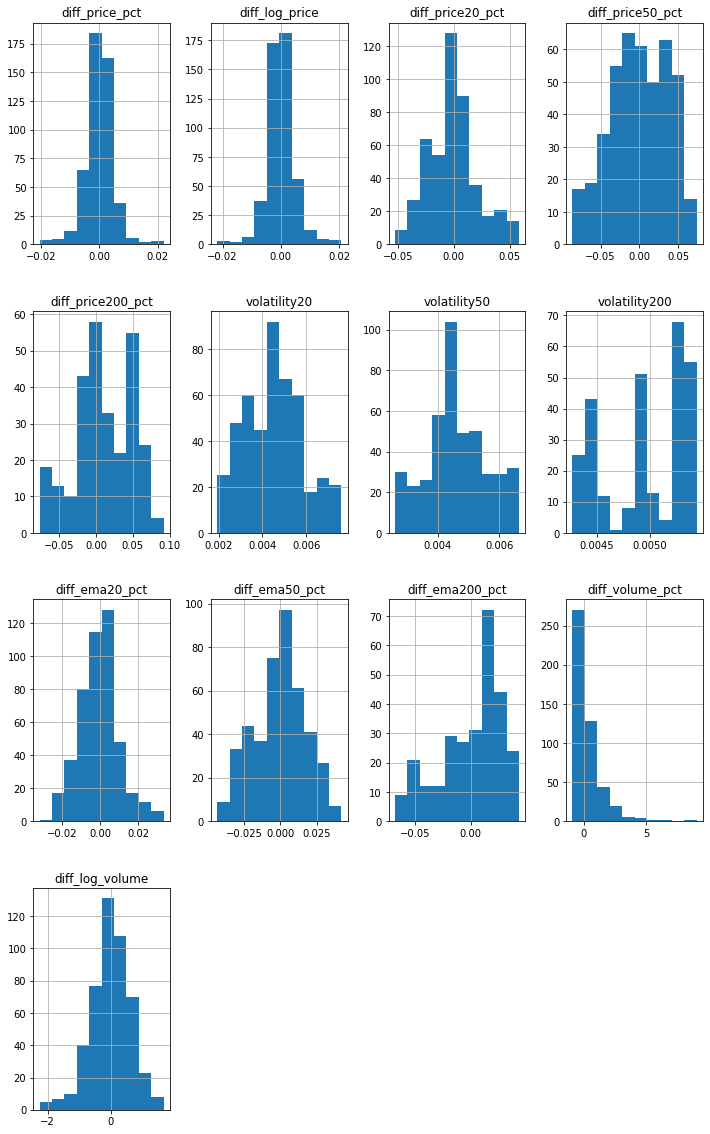

In [5]:
df = load_data("../data/ETHUSD/15", limit_days=5)
print(df.head(3))

tmp = preprocessing(df)
tmp.hist(figsize=(12, 20))
print(tmp.head(3))
